<a href="https://colab.research.google.com/github/britoguilherme75/Atividade-3---IA/blob/main/Projeto_de_Aplica%C3%A7%C3%A3o_C%C3%A2ncer_de_Colo_do_%C3%9Atero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto de Aplicação - Modelo de Predição de Câncer de Colo do útero

Este projeto é a conclusão da disciplina de Inteligência Artificial e Tecnologia, ministrada pelos professores Flávio Seixas, Érito Marques e Cláudio Tinoco.

Alunos: Kaiky Guida e Guilherme Brito

#Motivação e Objetivo
O câncer de colo de útero é uma das neoplasias mais prevalentes entre as mulheres e apresenta uma alta taxa de mortalidade, especialmente em países de baixa e média renda. Estima-se que mais de 95% dos casos dessa doença estejam relacionados à infecção pelo Papilomavírus Humano (HPV), uma infecção viral que pode passar despercebida, já que a maioria das instâncias de câncer de colo do útero é assintomática em seus estágios iniciais. Esse cenário desafia os sistemas de saúde a aprimorar as estratégias de diagnóstico precoce e tratamento eficaz.

Nesse contexto, o presente trabalho propõe o desenvolvimento de um modelo de predição utilizando técnicas de aprendizado de máquina supervisionado para prever o resultado da biópsia cervical em relação à presença de câncer de colo do útero. O objetivo principal é estabelecer uma base sólida para um modelo de predição que possa ser testado e avaliado quanto à sua eficácia e precisão no diagnóstico dessa neoplasia, contribuindo assim para a melhoria dos processos de detecção e tratamento precoce.

#Descrição do dataset

O dataset escolhido foi recolhido no Hospital Universitario de Caracas, em Caracas, na Venezuela e compreende informações demográficas, hábitos de vida e histórico médico de 858 pacientes. Em certos casos, os pacientes optaram por não responder as perguntas ou decidiram omitir dados por motivos de privacidade e, portanto, há dados faltantes.

Os dados foram tratados por intermédio do Transfering Learning (TL), ao promover o treinamento de classificação de uma base de dados (MRI) a partir do conhecimento padronizado de outra base de dados (exame citológico cervical).

O dataset foi desenvolvido, coletado e manipulado originalmente para a predição de indicadores/diagnóstico de câncer do colo do útero e apresenta 36 variáveis, dentre elas Idade, presença ou não de ISTs, resultados de Biópsias, Citologia, colposcopia entre outros.

https://archive.ics.uci.edu/dataset/383/cervical+cancer+risk+factors

In [ ]:
!pip install ucimlrepo

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.svm import SVC #SVM
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
import graphviz

import statsmodels.api as sm

In [ ]:
from ucimlrepo import fetch_ucirepo

# Fetch dataset
cervical_cancer_risk_factors = fetch_ucirepo(id=383)

# Verificando se o dataset foi carregado corretamente
print(cervical_cancer_risk_factors)

# Acessando os dados como DataFrame do pandas
X = cervical_cancer_risk_factors.data.features

# Usando a coluna 'Biopsy' como target
target_column = 'Biopsy'


# Separando a coluna do target
y = X[target_column]

# Removendo a coluna de target de X para que X contenha apenas as features
X = X.drop(columns=[target_column])

# Verificando os primeiros valores de X e y
print(X.head())
print(y.head())

Inicialmente, o resultado da biópsia do paciente era uma feature, ou seja, pertencia à classe X, neste código,
separamos ela em uma coluna isolada e atribuímos à variável y.

{'data': {'ids': None, 'features':      Age  Number of sexual partners  First sexual intercourse  \
0     18                        4.0                      15.0   
1     15                        1.0                      14.0   
2     34                        1.0                       NaN   
3     52                        5.0                      16.0   
4     46                        3.0                      21.0   
..   ...                        ...                       ...   
853   34                        3.0                      18.0   
854   32                        2.0                      19.0   
855   25                        2.0                      17.0   
856   33                        2.0                      24.0   
857   29                        2.0                      20.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0                   1.0     0.0             0.0                  0.0   
1                   1.0     0.0         

#Preparação dos dados
- Preenchimento de dados faltantes
- Normalização de dados
- Balanceamento das classes
- Divisão em conjuntos de treinamento e de teste
- Deduplicação de dados (removido)
- Remoção de variáveis altamente correlatas (removido)

In [ ]:
print(X.describe())

              Age  Number of sexual partners  First sexual intercourse  \
count  858.000000                 832.000000                851.000000   
mean    26.820513                   2.527644                 16.995300   
std      8.497948                   1.667760                  2.803355   
min     13.000000                   1.000000                 10.000000   
25%     20.000000                   2.000000                 15.000000   
50%     25.000000                   2.000000                 17.000000   
75%     32.000000                   3.000000                 18.000000   
max     84.000000                  28.000000                 32.000000   

       Num of pregnancies      Smokes  Smokes (years)  Smokes (packs/year)  \
count          802.000000  845.000000      845.000000           845.000000   
mean             2.275561    0.145562        1.219721             0.453144   
std              1.447414    0.352876        4.089017             2.226610   
min              0.00

In [ ]:
features = X.columns
X.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,NaN,NaN,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,NaN,NaN,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,NaN,NaN,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0,NaN,NaN,1,0,1,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0,NaN,NaN,0,0,0,0,0,0,0


In [ ]:
#Usando o KNNImputer para o preenchimento dos dados faltantes
from sklearn.impute import KNNImputer
import numpy as np
import pandas as pd

imputer = KNNImputer(n_neighbors=2)
X = imputer.fit_transform(X)
X = pd.DataFrame(X, columns=features)

X.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.5,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.5,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,1.0,24.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.5,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.0,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,4.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,46.0,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,21.5,21.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Normalização de dados
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=features)
X.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,0.070423,0.111111,0.227273,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.023810,0.023810,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.028169,0.000000,0.181818,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.023810,0.023810,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.295775,0.000000,0.659091,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.071429,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.549296,0.148148,0.272727,0.363636,1.0,1.0,1.0,1.0,0.1,0.0,...,0.0,0.142857,0.142857,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.464789,0.074074,0.500000,0.363636,0.0,0.0,0.0,1.0,0.5,0.0,...,0.0,0.976190,0.976190,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Tratamento de classe y
y.value_counts()

#0: Indica que a biópsia não detectou a presença de células cancerígenas ou pré-cancerígenas. Em outras palavras, o resultado da biópsia é negativo para câncer de colo do útero.
#1: Indica que a biópsia detectou a presença de células cancerígenas ou pré-cancerígenas. Nesse caso, o resultado da biópsia é positivo para câncer de colo do útero.

#A presença de um número muito maior de casos negativos do que positivos indica que o dataset é desbalanceado, o que é importante considerar ao treinar e avaliar o modelo de aprendizado de máquina.

,count
Biopsy,
0,803
1,55


Proporções entre as classes:
 Biopsy
0    0.935897
1    0.064103
Name: count, dtype: float64


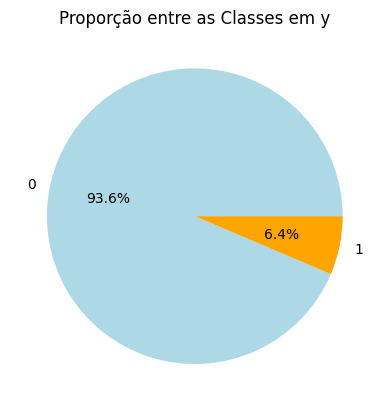

In [ ]:
#Visualização da proporção entre as classes

#Ocorrências por classe
value_counts = y.value_counts()

# Cálculo das proporções
proportions = value_counts / len(y)

print("Proporções entre as classes:\n", proportions)

# Gráfico de pizza das proporções
proportions.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'orange'])
plt.title('Proporção entre as Classes em y')
plt.ylabel('')
plt.show()


In [ ]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Balanceamento de dados - SMOTE
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE no conjunto de treinamento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verificando o balanceamento após o SMOTE
print(y_train_smote.value_counts())

Biopsy
0    560
1    560
Name: count, dtype: int64


Proporções entre as classes:
 Biopsy
0    0.652681
1    0.652681
Name: count, dtype: float64


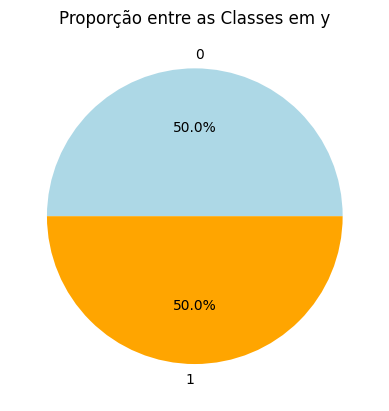

In [ ]:
#Proporção entre as classes no conjunto de treino

#Ocorrências por classe
value_counts_smote = y_train_smote.value_counts()

# Cálculo das proporções
proportions = value_counts_smote / len(y)

print("Proporções entre as classes:\n", proportions)

# Gráfico de pizza das proporções
proportions.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'orange'])
plt.title('Proporção entre as Classes em y')
plt.ylabel('')
plt.show()


#Treinamento do modelo de aprendizado de máquina
**- Modelos selecionados:**
*   Decision Tree
*   Random Forest
*   Support Vector Machine (SVM)
*   Logistic Regression
*   KNN


In [ ]:
# Defina os modelos que você deseja testar
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier()
}

# Defina os parâmetros que você deseja ajustar para cada modelo
parameters = {
    'Decision Tree': {'max_depth': [None, 2, 3, 4]},
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'SVM': {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001]},
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'KNN': {'n_neighbors': [3, 5, 7, 9, 11, 13, 41]}
}

In [ ]:
#Busca pelo melhor modelo e melhores hiperparâmetros

best_model = None
best_score = 0

# Iterar sobre os modelos e parâmetros para encontrar o melhor modelo
for model_name, model in models.items():
    clf = GridSearchCV(model, parameters[model_name], cv=5)
    clf.fit(X_train_smote, y_train_smote)
    score = clf.best_score_
    print(f"{model_name}: {score}")

    if score > best_score:
        best_model = clf.best_estimator_
        best_score = score

# O melhor modelo e seus parâmetros
print("Melhor modelo:", best_model)

Decision Tree: 0.9741071428571428
Random Forest: 0.9803571428571429
SVM: 0.9580357142857142
Logistic Regression: 0.9571428571428571
KNN: 0.9660714285714287
Melhor modelo: RandomForestClassifier(n_estimators=200)


#Avaliação do Modelo

In [ ]:
# Faça previsões nos dados de teste
y_pred = best_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       243
           1       0.67      0.67      0.67        15

    accuracy                           0.96       258
   macro avg       0.82      0.82      0.82       258
weighted avg       0.96      0.96      0.96       258



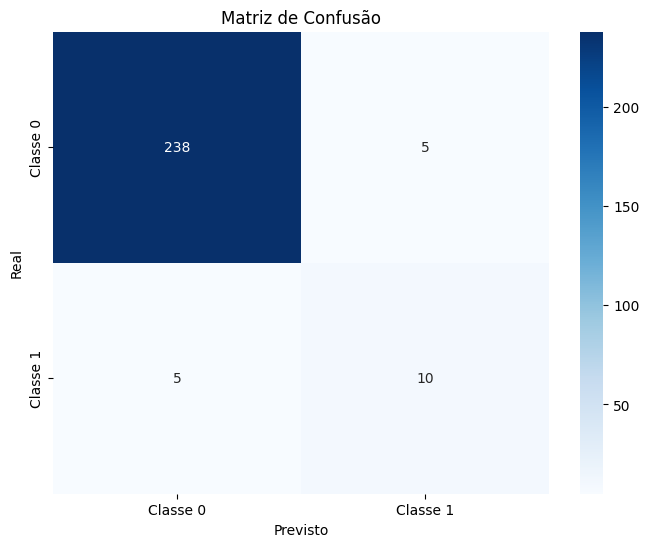

In [ ]:
# Calcule a matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels = [0, 1])

# Crie um heatmap da matriz de confusão usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

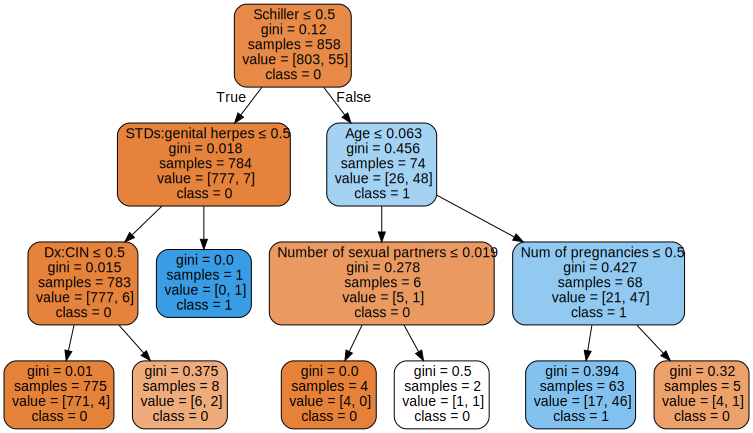

In [ ]:
#Visualização do modelo de Árvore de Decisão

clf = GridSearchCV(DecisionTreeClassifier(), parameters['Decision Tree'], cv = 5)
clf.fit(X, y)

best_model = clf.best_estimator_
best_score = score

def viewDecisionTree(model, column_names):
    '''Visualise the decision tree'''

    dot_data = tree.export_graphviz(model, out_file=None,
            feature_names=column_names,
            class_names=[str(classe) for classe in model.classes_],
            filled=True, rounded=True,
            special_characters=True)
    graph = graphviz.Source(dot_data)
    return graph


viewDecisionTree(best_model, features)

#Conclusão



A partir da estruturação e de testes do modelo de predição da ocorrência do câncer de colo de útero, fundamentado em base de dados dotada de características técnicas e subjetivas acerca de tal patologia, foi constatada importante precisão no diagnóstico da neoplasia do colo uterino.

Embora haja falhas ligadas à quantidade e à qualidade dos dados utilizados para o aprendizado de máquina, a acurácia e a precisão foram elevadas. O melhor modelo de predição construído foi o Random Forest, com maior eficácia na definição dos diagnósticos verdadeiros positivos.

Logo, este projeto de aprendizado de máquina emerge como um potencial suporte para o diagnóstico precoce do câncer de colo de útero, de modo a inibir o agravamento do quadro de saúde dos portadores de tal neoplasia em estágio inicial, permitindo,assim, a redução dos custos diretos e indiretos com a enfermidade no sistema de saúde.


# Aplicabilidade e prosseguimento deste projeto
1) Captação de investimentos iniciais de possíveis stakeholders;


2) Construção e verificação do modelo (Minimum Viable Product);
- Possibilidade de aplicação do modelo inicial no centro de oncologia do Hospital Universitário Antônio Pedro, após cumprimento de diretrizes éticas.



3) Expansão da cobertura no sistema de saúde.

#Referências

Fernandes K, Chicco D, Cardoso JS, Fernandes J. 2018. Supervised deep learning embeddings for the prediction of cervical cancer diagnosis. PeerJ Computer Science 4:e154 https://doi.org/10.7717/peerj-cs.154

Fernandes, K., Cardoso, J. S., & Fernandes, J. (2017). Transfer Learning with Partial Observability Applied to Cervical Cancer Screening. Lecture Notes in Computer Science, 243–250. doi:10.1007/978-3-319-58838-4_27

